# Graduate Admission Prediction

In [144]:
import pandas as pd

In [145]:
data = pd.read_csv('./Admission_Predict.csv')

#### 1. Display top 5 rows

In [146]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### 2. Display last 5 rows

In [147]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


#### 3. find shape

In [148]:
data.shape

(400, 9)

#### 4. get information about dataset like total rows, columns, datatypes etc.

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


#### 5. check null values

In [150]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### 6. get overall statistics about dataset

In [151]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### 7. dropping irrelevant features

In [152]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [153]:
data = data.drop('Serial No.', axis=1)

In [154]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

#### 8. Store feature matrix in X & target in y

In [155]:
X = data.drop('Chance of Admit ', axis=1)
y=data['Chance of Admit ']

#### 9. splitting dataset into training and testing

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### 10. Feature Scaling

In [158]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
sc = StandardScaler()

In [161]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [162]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

#### 11. Import models

In [163]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### 12. model training

In [165]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

#### 13. prediction on test data

In [166]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

#### 14. Evaluating algorithm

In [167]:
from sklearn import metrics

In [168]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [169]:
final_data = pd.DataFrame({'Models': ['LR', 'SVR', 'RF', 'GR'],'R2_SCORE':[score1, score2, score3, score4]})
final_data

,Models,R2_SCORE
0,LR,0.821208
1,SVR,0.759781
2,RF,0.803745
3,GR,0.794358


In [170]:
import seaborn as sns

<AxesSubplot: xlabel='Models', ylabel='R2_SCORE'>

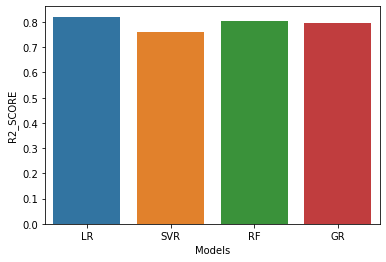

In [171]:
sns.barplot(x=final_data['Models'], y=final_data['R2_SCORE'])

In [172]:
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

In [173]:
X = sc.fit_transform(X)

In [174]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [175]:
lr.predict(sc.transform([[337, 118, 4, 4.5, 4.5, 9.65, 1]]))

c:\Users\Shakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.95145856])

### --> Classification

In [176]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [177]:
import numpy as np

In [178]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_test = [1 if value>0.8 else 0 for value in y_test]

In [179]:
y_train = np.array(y_train)
y_test = np.array(y_test)

#### 15. import models

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import  accuracy_score

#### 16. model training & evaluation

In [181]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
score1 = accuracy_score(y_test, y_pred1)

In [182]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
score2 = accuracy_score(y_test, y_pred2)

In [183]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
score3 = accuracy_score(y_test, y_pred3)

In [184]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)
score4 = accuracy_score(y_test, y_pred4)

In [185]:
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)
y_pred5 = gr.predict(X_test)
score5 = accuracy_score(y_test, y_pred5)

In [186]:
final_data = pd.DataFrame({'Models': ['LR', 'SVM', 'KNN', 'RF', 'GR'],'ACCURACY_SCORE':[score1, score2, score3, score4, score5]})
final_data

,Models,ACCURACY_SCORE
0,LR,0.9250
1,SVM,0.9250
2,KNN,0.8875
3,RF,0.9375
4,GR,0.9750


In [187]:
import seaborn as sns

<AxesSubplot: xlabel='Models', ylabel='ACCURACY_SCORE'>

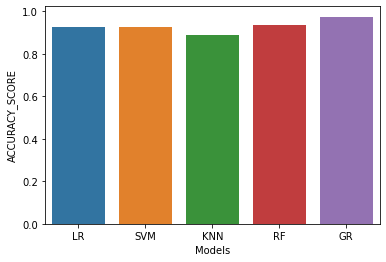

In [188]:
sns.barplot(x=final_data['Models'], y=final_data['ACCURACY_SCORE'])

#### 17. save model

In [189]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [190]:
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

In [191]:
y = [1 if value>0.8 else 0 for value in y]

In [192]:
y = np.array(y)

In [193]:
X = sc.fit_transform(X)

In [194]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [195]:
gr = GradientBoostingClassifier()
gr.fit(X, y)

GradientBoostingClassifier()

In [196]:
import joblib

In [197]:
joblib.dump(gr, 'Admission_Prediction')

['Admission_Prediction']

In [198]:
model = joblib.load('Admission_Prediction')

In [199]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [200]:
model.predict(sc.transform([[337, 118, 4, 4.5, 4.5, 9.65, 1]]))

c:\Users\Shakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])